In [1]:
# Dependencies
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
from pprint import pprint

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/forecast?q=Atlanta&appid=08e5e0726d2dd6ba61dfc61132143db1&units=imperial"
# units = 'imperial'


# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
response = requests.get(url).json()

pprint(response)

{'city': {'coord': {'lat': 33.749, 'lon': -84.388},
          'country': 'US',
          'id': 4180439,
          'name': 'Atlanta',
          'population': 420003,
          'sunrise': 1587380402,
          'sunset': 1587427934,
          'timezone': -14400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 1},
           'dt': 1587427200,
           'dt_txt': '2020-04-21 00:00:00',
           'main': {'feels_like': 58.37,
                    'grnd_level': 974,
                    'humidity': 50,
                    'pressure': 1011,
                    'sea_level': 1010,
                    'temp': 62.85,
                    'temp_kf': -0.65,
                    'temp_max': 64.02,
                    'temp_min': 62.85},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'clear sky',
                        'icon': '01d',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 310, 'speed': 5.46}},
          {

           'main': {'feels_like': 63.52,
                    'grnd_level': 973,
                    'humidity': 82,
                    'pressure': 1009,
                    'sea_level': 1009,
                    'temp': 66.42,
                    'temp_kf': 0,
                    'temp_max': 66.42,
                    'temp_min': 66.42},
           'rain': {'3h': 0.74},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'light rain',
                        'icon': '10d',
                        'id': 500,
                        'main': 'Rain'}],
           'wind': {'deg': 236, 'speed': 11.45}},
          {'clouds': {'all': 81},
           'dt': 1587826800,
           'dt_txt': '2020-04-25 15:00:00',
           'main': {'feels_like': 68.29,
                    'grnd_level': 974,
                    'humidity': 65,
                    'pressure': 1010,
                    'sea_level': 1010,
                    'temp': 71.56,
                    'temp_kf': 0,
      

In [4]:
##list.main.temp []
##list.rain []
##list.weather.Descrip []
##for measure in measures...pull dates
## try catch except for rain list append 0
date = []
temp = []
precip = []

##range =list(range(40))
##print(range)



In [5]:
for x in range(0,39):
    date.append(response['list'][x]['dt_txt'])
    #print(date)
    temp.append(response['list'][x]['main']['temp'])
    #print(temp)
    try:
        precip.append(response['list'][x]['rain']['3h'])
        #print(precip)
    except KeyError:
        precip.append(0)

In [6]:
print(temp)
print(precip)

[62.85, 57.99, 55.18, 53.24, 54.18, 67.48, 73.17, 73, 64.65, 58.44, 54.37, 50.85, 51.04, 63.3, 70.39, 70.18, 63.7, 61.81, 56.48, 56.66, 58.1, 60.69, 71.55, 75.25, 67.48, 62.33, 57.38, 54.66, 55.4, 70.05, 78.35, 79.84, 72.25, 67.21, 66.33, 65.17, 66.42, 71.56, 77.86]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.71, 3.66, 16.16, 21.92, 2.74, 2.2, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16, 0.74, 0.58, 0]


In [7]:
forecast_dict = {
    "date": date,
    "temp": temp,
    "precipitation" : precip
}

df = pd.DataFrame(forecast_dict)
df

,date,temp,precipitation
0,2020-04-21 00:00:00,62.85,0.00
1,2020-04-21 03:00:00,57.99,0.00
2,2020-04-21 06:00:00,55.18,0.00
3,2020-04-21 09:00:00,53.24,0.00
4,2020-04-21 12:00:00,54.18,0.00
5,2020-04-21 15:00:00,67.48,0.00
6,2020-04-21 18:00:00,73.17,0.00
7,2020-04-21 21:00:00,73.00,0.00
8,2020-04-22 00:00:00,64.65,0.00
9,2020-04-22 03:00:00,58.44,0.00


In [8]:
# date is in UNIX format, convert to datetime
df['date'] = pd.to_datetime(df['date']) 

#datetime is in hours/seconds, use dt.date to remove hours
df['date'] = df['date'].dt.date

# converting report date to match format of weather data
#df['date'] = pd.to_datetime(df['date'])

df

,date,temp,precipitation
0,2020-04-21,62.85,0.00
1,2020-04-21,57.99,0.00
2,2020-04-21,55.18,0.00
3,2020-04-21,53.24,0.00
4,2020-04-21,54.18,0.00
5,2020-04-21,67.48,0.00
6,2020-04-21,73.17,0.00
7,2020-04-21,73.00,0.00
8,2020-04-22,64.65,0.00
9,2020-04-22,58.44,0.00


In [9]:
df.loc[df['precipitation'] > 0, 'rain'] = 1 
df.loc[df['precipitation'] == 0, 'rain'] = 0 

df 

,date,temp,precipitation,rain
0,2020-04-21,62.85,0.00,0.0
1,2020-04-21,57.99,0.00,0.0
2,2020-04-21,55.18,0.00,0.0
3,2020-04-21,53.24,0.00,0.0
4,2020-04-21,54.18,0.00,0.0
5,2020-04-21,67.48,0.00,0.0
6,2020-04-21,73.17,0.00,0.0
7,2020-04-21,73.00,0.00,0.0
8,2020-04-22,64.65,0.00,0.0
9,2020-04-22,58.44,0.00,0.0


In [10]:
prediction_df = df.groupby('date').mean().reset_index()
prediction_df

,date,temp,precipitation,rain
0,2020-04-21,62.136250,0.000000,0.000000
1,2020-04-22,60.402500,0.000000,0.000000
2,2020-04-23,63.030000,6.173750,0.750000
3,2020-04-24,65.686250,0.047500,0.125000
4,2020-04-25,69.542857,0.211429,0.428571


In [11]:
prediction_df['forecasted_crime'] = prediction_df['temp']*1.3 + prediction_df['rain']*10
prediction_df

,date,temp,precipitation,rain,forecasted_crime
0,2020-04-21,62.136250,0.000000,0.000000,80.777125
1,2020-04-22,60.402500,0.000000,0.000000,78.523250
2,2020-04-23,63.030000,6.173750,0.750000,89.439000
3,2020-04-24,65.686250,0.047500,0.125000,86.642125
4,2020-04-25,69.542857,0.211429,0.428571,94.691429


In [ ]:
prediction_df.to_csv('weather_prediction.csv')

In [ ]:
x_values = prediction_df['date']
y_values = prediction_df['forecasted_crime']
plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('Crime Forecast')
ax.set_xlim = ('2020-04-05', '2020-04-31')
plt.show()

In [13]:
prediction_df.set_index('date', inplace = True)
prediction_df

,temp,precipitation,rain,forecasted_crime
date,,,,
2020-04-21,62.136250,0.000000,0.000000,80.777125
2020-04-22,60.402500,0.000000,0.000000,78.523250
2020-04-23,63.030000,6.173750,0.750000,89.439000
2020-04-24,65.686250,0.047500,0.125000,86.642125
2020-04-25,69.542857,0.211429,0.428571,94.691429


In [14]:
## prediction_df['rain'] = prediction_df['rain']*100
## prediction_df

In [15]:
new_crimedf = pd.DataFrame(prediction_df[['forecasted_crime','temp','rain']])

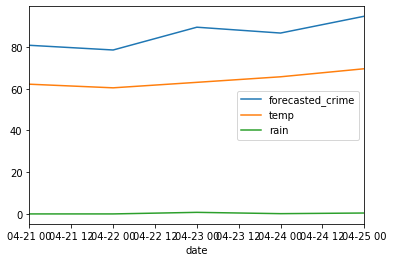

In [16]:
## default is a line graph
new_crimedf.plot()

In [ ]:
prediction_df['forecasted_crime'] = prediction_df['temp']*.82 + prediction_df['rain']*5.6
prediction_df

In [ ]:
## Trying Candice's updated coefficients
candice_df = pd.DataFrame(prediction_df[['forecasted_crime','temp','rain']])
candice_df.plot()

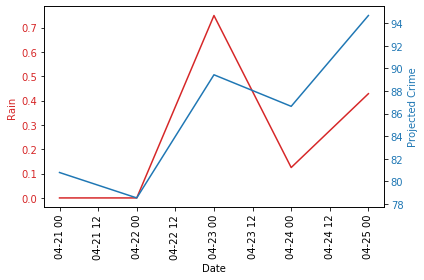

In [25]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Rain', color=color)
ax1.plot(new_crimedf.index, new_crimedf.rain, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Projected Crime', color=color)  # we already handled the x-label with ax1
ax2.plot(new_crimedf.index, new_crimedf.forecasted_crime, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()